# US Alexa Ranks of Online News Media

## Instructions

1. To update Alexa US rank data and overwrite `ranks.csv`, simply run all cells below.
2. To add a website to the rank data collection, manually add a row to the end of `siteinfo.csv` before running the cells below. Make sure to use the URL that Alexa uses for ranking.
3. To remove a website, manually remove the site's data from `siteinfo.csv` before running the cells below.

## Package Imports

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

## Load Site Info

In [3]:
siteinfo = pd.read_csv('siteinfo.csv')

Sort the sites by Name and save the results to `siteinfo.csv`.

In [4]:
siteinfo.sort_values(by='Name', inplace=True)
siteinfo.to_csv('siteinfo.csv', index=False)

In [5]:
siteinfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 76
Data columns (total 2 columns):
Name    77 non-null object
URL     77 non-null object
dtypes: object(2)
memory usage: 1.8+ KB


In [6]:
siteinfo.sample(5)

,Name,URL
53,The American Conservative,theamericanconservative.com
41,Politico,politico.com
22,Forbes,forbes.com
51,TYT Network,tytnetwork.com
27,International Business Times,ibtimes.com


## Scrape Current Site Ranks

Subroutine to find the current Alexa rank "Rank in United States" via a scrape of alexa.com.

In [7]:
def find_US_rank(url):
    'Find the Alexa Rank in the United States of the given URL'
    try:
        dfs = pd.read_html('http://www.alexa.com/siteinfo/%s' % url)
        idx = 0
        while True:
            country_ranks = dfs[idx]
            try:
                country_ranks.set_index('Country', inplace=True)
                return country_ranks.loc['United States', 'Rank in Country']
            except:
                idx += 1
    except:
        print('\tWARNING: Lookup failed on %s' % url)
        return np.nan

Find the currents ranks of all sites in `siteinfo` and store the results in the dict `current_ranks`.

In [8]:
num_sites = siteinfo.shape[0]
current_ranks = {'UTC_datetime':datetime.datetime.utcnow()}

print('Scraping alexa.com...')
for (idx, row) in siteinfo.iterrows():
    current_ranks[row['Name']] = find_US_rank(row['URL'])
    
print('Done')

Scraping alexa.com...
Done


## Update Ranks Data

Load current ranks data.

In [9]:
ranks = pd.read_csv('ranks.csv')

In [10]:
ranks.loc[:,'UTC_datetime'] = pd.to_datetime(ranks['UTC_datetime'])

Append the current ranks to `ranks`.

In [11]:
ranks = ranks.append(current_ranks, ignore_index=True)

Reorder the site columns in `ranks` according to `siteinfo`, leaving the datetime as the first column. Any sites not in `siteinfo` are removed from `ranks`.

In [12]:
ranks = pd.concat([ranks['UTC_datetime'], ranks.loc[:,siteinfo['Name'].values]], axis=1)

In [13]:
ranks.tail()

,datetime,ABC News,AP News,Alternet,Axios,BBC,Bloomberg,Breitbart,Business Insider,BuzzFeed,CBS News,CNBC,CNN,Center for Investigative Reporting,Chron,Common Dreams,Conservative Review,Daily Beast,Daily Mail,Daily Wire,Democracy Now!,Drudge Report,FiveThirtyEight,Forbes,Fortune,Fox News,HuffPost,Infowars,International Business Times,LA Times,MSNBC,Media Matters for America,Mediaite,Mother Jones,NBC News,NPR,NY Daily News,National Review,New York Post,New York Times,Newsweek,PolitiFact,Politico,ProPublica,RawStory,RealClearPolitics,Reason,Reuters,SFGate,Salon,Shareblue Media,Slate,TYT Network,Talking Points Memo,The American Conservative,The Atlantic,The Boston Globe,The Daily Caller,The Daily Stormer,The Guardian,The Hill,The Independent,The Intercept,The Nation,The New Yorker,The Verge,ThinkProgress,Time Magazine,Truthdig,Truthout,U.S. News & World Report,USA Today,Vice,Vox,Wall Street Journal,Washington Examiner,Washington Post,Washington Times
0,2017-11-15 12:00:00.000000,277,949,2457,1318,83,170,50,92,55,240,180,27,29557,356,5238,16442,275,97,697,4687,150,391,77,602,56,70,844,706,179,665,5235,1381,1804,206,147,269,1400,160,31,327,2209,201,5058,975,1173,3358,268,314,657,2851,279,10010,1455,8163,250,1100,NaN,NaN,104,183,335,2392,3350,393,154,1362,264,15229,11515,208,111,89,380,171,NaN,48,1359
1,2018-03-02 05:04:22.252590,249,1088,2903,1036,80,155,54,100,66,193,143,24,34240,335,4820,17709,317,109,780,5522,157,482,95,684,57,78,1006,4166,220,687,6430,1696,1533,196,130,375,1302,165,30,512,1943,229,4892,996,1210,2786,245,346,1062,7359,300,10424,1642,9515,237,998,172.0,8538.0,110,171,394,1996,3591,431,138,1050,183,12708,10288,209,92,84,321,162,1262.0,61,1355


Save `ranks.csv`.

In [14]:
ranks.to_csv('ranks.csv', index=False)

## Plots

C:\Users\Joe\Anaconda3\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


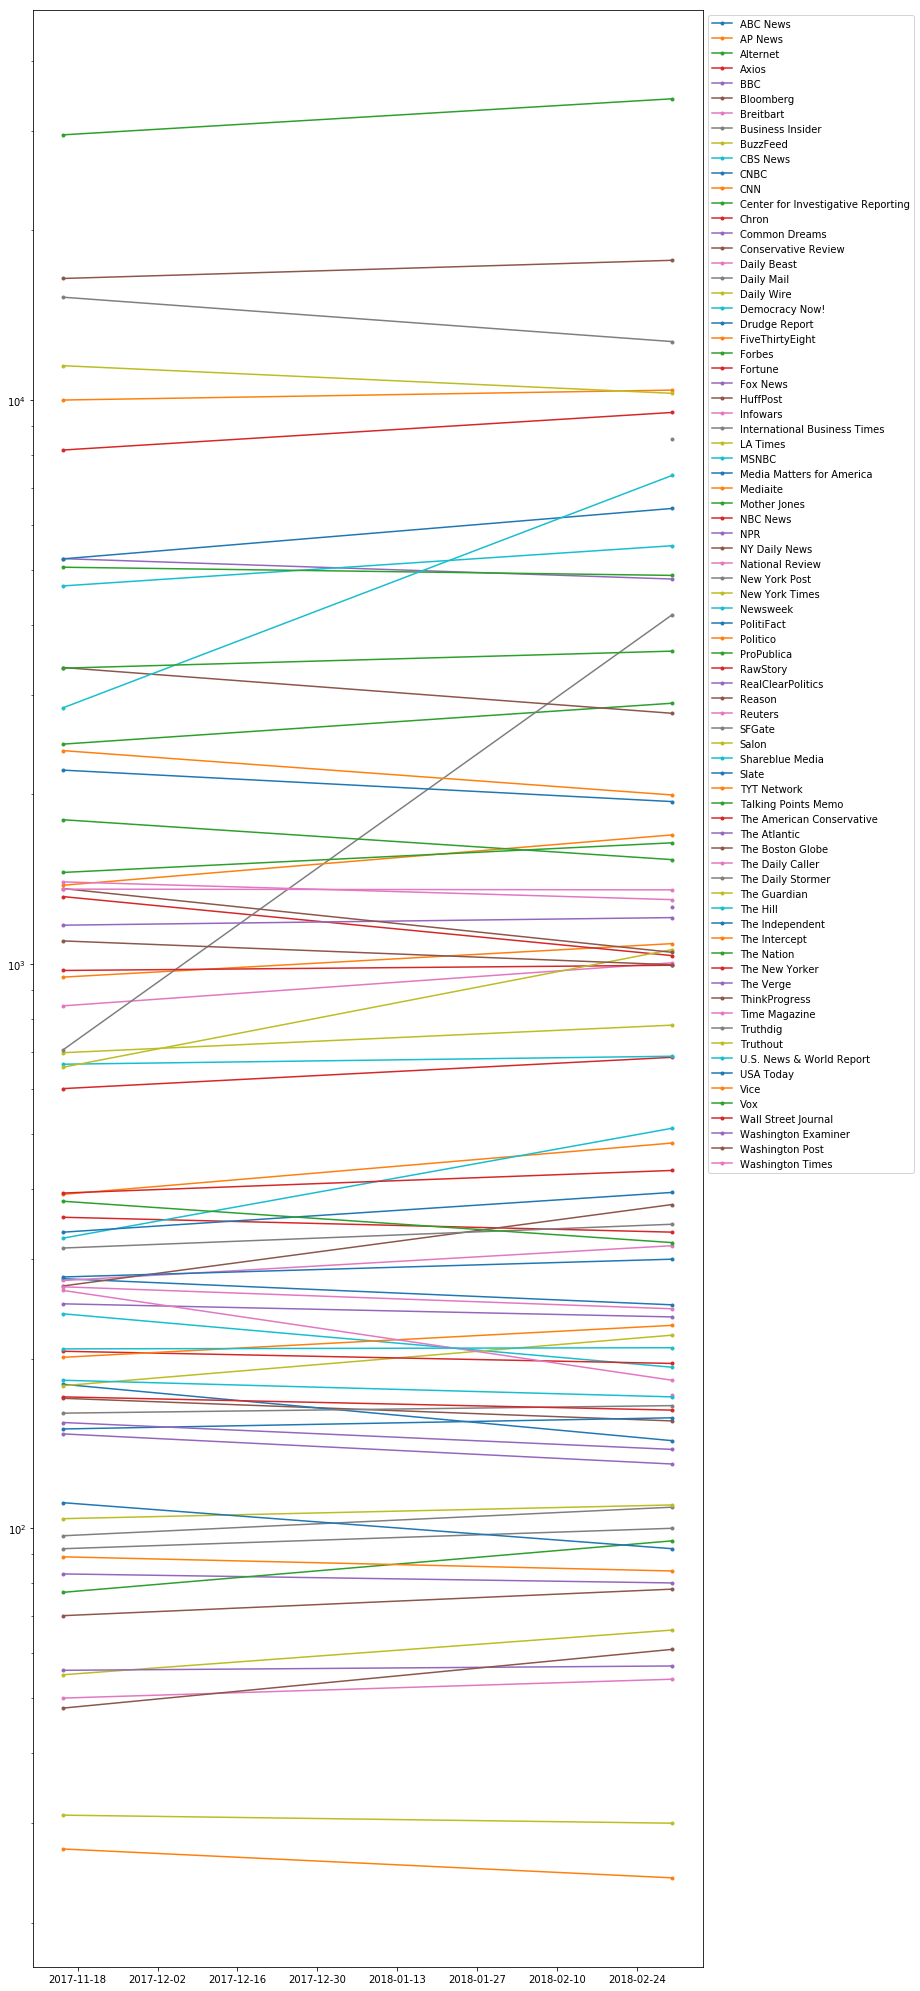

In [16]:
f, ax = plt.subplots(figsize=(12, 36))
ax.set(yscale="log")
for col in ranks.columns[1:]:
    plt.plot(ranks['UTC_datetime'], ranks[col], '.-')
plt.legend(ranks.columns[1:], bbox_to_anchor=(1,1))